In [2]:
import pickle
import numpy as np

In [3]:
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [4]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [5]:
type(test_data)

list

In [6]:
type(train_data)

list

In [7]:
len(train_data)

10000

In [8]:
len(test_data)

1000

In [10]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [12]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [13]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [15]:
train_data[0][2]

'no'

In [16]:
#Make a vocabulary with all data from train and test
all_data = test_data + train_data

In [17]:
len(all_data)

11000

In [25]:
vocab = set()

for story,question,answer in all_data:
    #set returns story, and question as a set then any new words get added to vocab
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [26]:
vocab.add('no')

In [27]:
vocab.add('yes')

In [28]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [30]:
#Add 1 because when using keras pad sequences there will be a place holder
vocab_len = len(vocab) + 1

In [31]:
vocab_len

38

In [33]:
#longest story
all_story_lens = [len(data[0]) for data in all_data]

In [36]:
max_story_len = max(all_story_lens)

In [37]:
#longest question
all_question_lens = [len(data[1]) for data in all_data]

In [38]:
max_question_len = max(all_question_lens)

In [39]:
max_question_len

6

In [40]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [41]:
#No filters
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [42]:
tokenizer.word_index

{'discarded': 1,
 'got': 2,
 '.': 3,
 'bathroom': 4,
 'kitchen': 5,
 'apple': 6,
 'to': 7,
 'office': 8,
 'yes': 9,
 'picked': 10,
 'left': 11,
 'back': 12,
 'no': 13,
 'bedroom': 14,
 'went': 15,
 '?': 16,
 'football': 17,
 'in': 18,
 'grabbed': 19,
 'dropped': 20,
 'mary': 21,
 'hallway': 22,
 'the': 23,
 'sandra': 24,
 'john': 25,
 'travelled': 26,
 'put': 27,
 'moved': 28,
 'took': 29,
 'daniel': 30,
 'up': 31,
 'down': 32,
 'is': 33,
 'there': 34,
 'journeyed': 35,
 'milk': 36,
 'garden': 37}

In [43]:
#Seperate train tuples into 3 lists
train_story_text = []
train_question_text = []
train_answers = []

In [44]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [45]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [46]:
len(train_story_seq)

10000

In [47]:
train_story_seq

[[21, 28, 7, 23, 4, 3, 24, 35, 7, 23, 14, 3],
 [21,
  28,
  7,
  23,
  4,
  3,
  24,
  35,
  7,
  23,
  14,
  3,
  21,
  15,
  12,
  7,
  23,
  14,
  3,
  30,
  15,
  12,
  7,
  23,
  22,
  3],
 [21,
  28,
  7,
  23,
  4,
  3,
  24,
  35,
  7,
  23,
  14,
  3,
  21,
  15,
  12,
  7,
  23,
  14,
  3,
  30,
  15,
  12,
  7,
  23,
  22,
  3,
  24,
  15,
  7,
  23,
  5,
  3,
  30,
  15,
  12,
  7,
  23,
  4,
  3],
 [21,
  28,
  7,
  23,
  4,
  3,
  24,
  35,
  7,
  23,
  14,
  3,
  21,
  15,
  12,
  7,
  23,
  14,
  3,
  30,
  15,
  12,
  7,
  23,
  22,
  3,
  24,
  15,
  7,
  23,
  5,
  3,
  30,
  15,
  12,
  7,
  23,
  4,
  3,
  30,
  10,
  31,
  23,
  17,
  34,
  3,
  30,
  15,
  7,
  23,
  14,
  3],
 [21,
  28,
  7,
  23,
  4,
  3,
  24,
  35,
  7,
  23,
  14,
  3,
  21,
  15,
  12,
  7,
  23,
  14,
  3,
  30,
  15,
  12,
  7,
  23,
  22,
  3,
  24,
  15,
  7,
  23,
  5,
  3,
  30,
  15,
  12,
  7,
  23,
  4,
  3,
  30,
  10,
  31,
  23,
  17,
  34,
  3,
  30,
  15,
  7,
  23,
  14,
  

In [49]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    
    #Stories = X
    X = []
    
    #Questions
    Xq = []
    
    #Y correct answer (yes/no)
    Y = []
    
    
    for story,question,answer in data:
        
        #for each story
        x = [word_index[word.lower()] for word in story]
    
        #for each question
        xq = [word_index[word.lower()] for word in question]
        
        #for each answer
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        #Appending to list of stories, questions, and answers
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [50]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [51]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [52]:
inputs_test

array([[ 0,  0,  0, ..., 23, 14,  3],
       [ 0,  0,  0, ..., 23, 37,  3],
       [ 0,  0,  0, ..., 23, 37,  3],
       ...,
       [ 0,  0,  0, ..., 23,  6,  3],
       [ 0,  0,  0, ..., 23, 37,  3],
       [ 0,  0,  0, ...,  6, 34,  3]])

In [53]:
inputs_train

array([[ 0,  0,  0, ..., 23, 14,  3],
       [ 0,  0,  0, ..., 23, 22,  3],
       [ 0,  0,  0, ..., 23,  4,  3],
       ...,
       [ 0,  0,  0, ..., 23, 14,  3],
       [ 0,  0,  0, ..., 36, 34,  3],
       [ 0,  0,  0, ...,  6, 34,  3]])

In [54]:
#Creating the model
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [55]:
#Two inputs story and question, we will use place holder "Input"
#Story place holder with shape (max_story_len, batch_size) 
#batch_size is empty since its not defined yet
input_sequence = Input((max_story_len,))

question = Input((max_question_len,))

In [58]:
#vocab_len
vocab_size = len(vocab) + 1

In [62]:
#Input Encoder M

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

#Output
# (samples, story_maxlen, embedding_dim)

In [63]:
#Input Encoder C

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

#Output
# (samples, story_maxlen, max_question_len)

In [64]:
#Question Encoder

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

#Output
# (samples, question_maxlen, embedding_dim)

In [71]:
#ENCODED <--- ENCODER(Input)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [72]:
#Dot product to compute match between story and question
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [74]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [75]:
answer = concatenate([response, question_encoded])

In [76]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [77]:
answer = LSTM(32)(answer)

In [78]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) #(samples, vocab_size) #Yes/No 0000

In [79]:
answer = Activation('softmax')(answer)

In [80]:
#This is how we link all the encoders together
model = Model([input_sequence, question], answer)

In [81]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [84]:
#Train the model
history = model.fit([inputs_train, questions_train], answers_train, batch_size=32, epochs=100, validation_data=([inputs_test, questions_test], answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 339us/step - loss: 0.6959 - accuracy: 0.4956 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 2/100
10000/10000 [==============================] - 3s 336us/step - loss: 0.6949 - accuracy: 0.4998 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 3/100
10000/10000 [==============================] - 3s 343us/step - loss: 0.6945 - accuracy: 0.5019 - val_loss: 0.6943 - val_accuracy: 0.4970
Epoch 4/100
10000/10000 [==============================] - 4s 382us/step - loss: 0.6949 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/100
10000/10000 [==============================] - 3s 315us/step - loss: 0.6941 - accuracy: 0.5050 - val_loss: 0.6948 - val_accuracy: 0.4970
Epoch 6/100
10000/10000 [==============================] - 3s 315us/step - loss: 0.6947 - accuracy: 0.4969 - val_loss: 0.6938 - val_accuracy: 0.5030
Epoch 7/100
10000/10000 [==============================] 

10000/10000 [==============================] - 4s 351us/step - loss: 0.3137 - accuracy: 0.8613 - val_loss: 0.3614 - val_accuracy: 0.8390
Epoch 56/100
10000/10000 [==============================] - 3s 306us/step - loss: 0.3149 - accuracy: 0.8622 - val_loss: 0.3589 - val_accuracy: 0.8380
Epoch 57/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.3094 - accuracy: 0.8665 - val_loss: 0.3697 - val_accuracy: 0.8370
Epoch 58/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.3108 - accuracy: 0.8671 - val_loss: 0.3828 - val_accuracy: 0.8410
Epoch 59/100
10000/10000 [==============================] - 3s 329us/step - loss: 0.3117 - accuracy: 0.8645 - val_loss: 0.3734 - val_accuracy: 0.8320
Epoch 60/100
10000/10000 [==============================] - 3s 311us/step - loss: 0.3099 - accuracy: 0.8685 - val_loss: 0.3699 - val_accuracy: 0.8300
Epoch 61/100
10000/10000 [==============================] - 3s 294us/step - loss: 0.3064 - accuracy: 0.8696 - val

In [85]:
model.save('My_QA_Model.h5')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


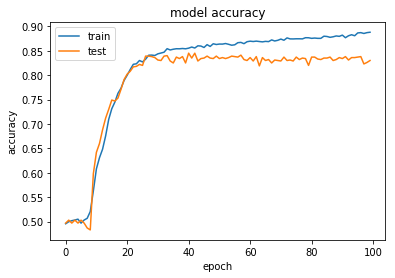

In [87]:
#Graphing
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [88]:
#model.load_weights('filename')
pred_results =model.predict(([inputs_test, questions_test]))

In [89]:
val_max = np.argmax(pred_results[0])

In [90]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [91]:
k

'no'

In [92]:
pred_results[0][val_max]

0.9999988

In [93]:
#writting my own stories and questions, must use same words in the vocabulary the model was trained on
my_story = "John left the kitchen . sandra dropped the football in the garden ."

In [94]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [95]:
my_question = "Is the football in the garden ?"

In [96]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [104]:
mydata = [(my_story.split(), my_question.split(), 'yes')]

In [105]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [106]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,
        11, 23,  5,  3, 24, 20, 23, 17, 18, 23, 37,  3]])

In [107]:
pred_results = model.predict(([my_story, my_ques]))

In [108]:
val_max = np.argmax(pred_results[0])

In [109]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [110]:
k

'yes'

In [111]:
pred_results[0][val_max]

0.8267994